In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

In [2]:
df = pd.read_csv('./Food_Inspections.csv')

In [3]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2453552,CLAMP DOWN BURGERS,NaN,2749943.0,NaN,Risk 2 (Medium),1742 W DIVISION ST,CHICAGO,IL,60622.0,10/20/2020,License,No Entry,NaN,41.903387,-87.671740,"(-87.67174026586648, 41.903386755553484)"
1,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
2,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
3,2386464,Uni Sushi Bristo,Uni Sushi Bistro,2262637.0,Restaurant,Risk 1 (High),1752 W NORTH AVE,CHICAGO,IL,60622.0,08/25/2020,Complaint,No Entry,NaN,41.910676,-87.672205,"(-87.67220465807979, 41.91067561170382)"
4,2386398,KIKI'S BISTRO,KIKI'S BISTRO,22899.0,Restaurant,Risk 1 (High),900 N FRANKLIN ST,CHICAGO,IL,60610.0,08/24/2020,Canvass,No Entry,NaN,41.898998,-87.635921,"(-87.63592067312285, 41.89899799424835)"


In [4]:
df.shape

(215067, 17)

In [5]:
df.Results.unique()

array(['No Entry', 'Pass', 'Out of Business', 'Fail',
       'Pass w/ Conditions', 'Not Ready', 'Business Not Located'],
      dtype=object)

In [9]:
df.describe()

,Inspection ID,License #,Zip,Latitude,Longitude
count,2.150670e+05,2.150500e+05,215015.000000,214357.000000,214357.000000
mean,1.528593e+06,1.630235e+06,60628.756640,41.880900,-87.676414
std,6.613738e+05,9.027383e+05,116.794766,0.081020,0.058523
min,4.424700e+04,0.000000e+00,10014.000000,41.644670,-87.914428
25%,1.188696e+06,1.247734e+06,60614.000000,41.832625,-87.707331
50%,1.528143e+06,1.992182e+06,60625.000000,41.891869,-87.666419
75%,2.104572e+06,2.278334e+06,60643.000000,41.939788,-87.634955
max,2.472696e+06,9.999999e+06,60827.000000,42.021064,-87.525094


### Mapa

In [6]:
chicago_map = gpd.read_file('./map/chicago_streets.shp')
# El de abajo es para cambiar el mapa por uno que solo muestra el área de Chicago
#chicago_map = gpd.read_file('./map/chicago.shp')

In [7]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
geo_df = gpd.GeoDataFrame(df,
                         crs=crs,
                         geometry=geometry)

/home/bruno/miniconda3/envs/dpa/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

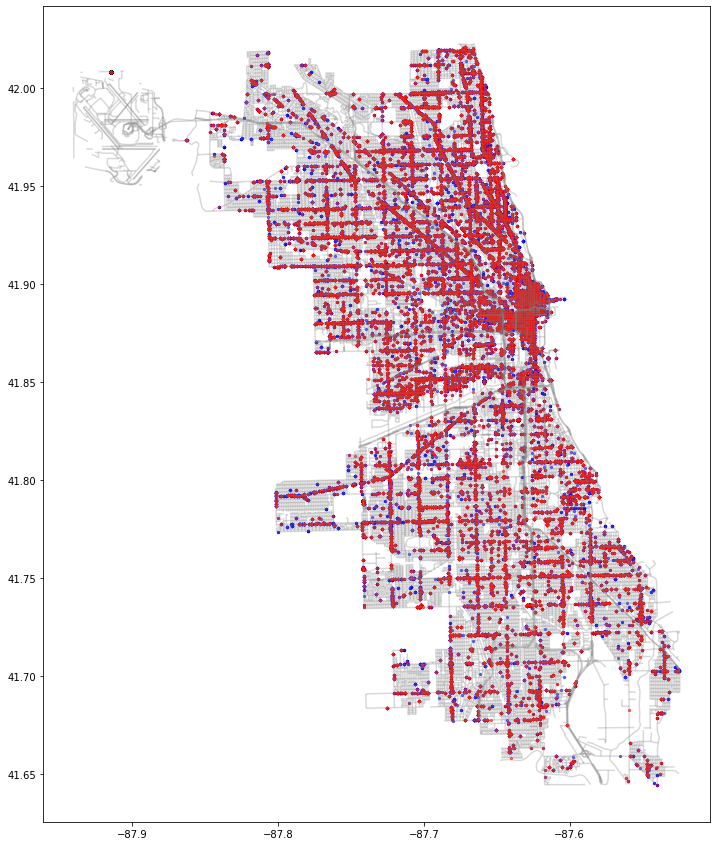

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
chicago_map.plot(ax=ax, alpha = 0.3, color='gray')
geo_df[geo_df['Results']=='Pass'].plot(ax=ax, markersize = 5, alpha = 0.6, color = 'blue')
geo_df[geo_df['Results']=='Fail'].plot(ax=ax, markersize = 5, alpha = 0.6, color = 'red')
#ctx.add_basemap(ax)

El de abajo es un intento para incluir el mapa de google de fondo

In [39]:
# db_wm = geo_df.to_crs(epsg=3857)

/home/bruno/miniconda3/envs/dpa/lib/python3.8/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


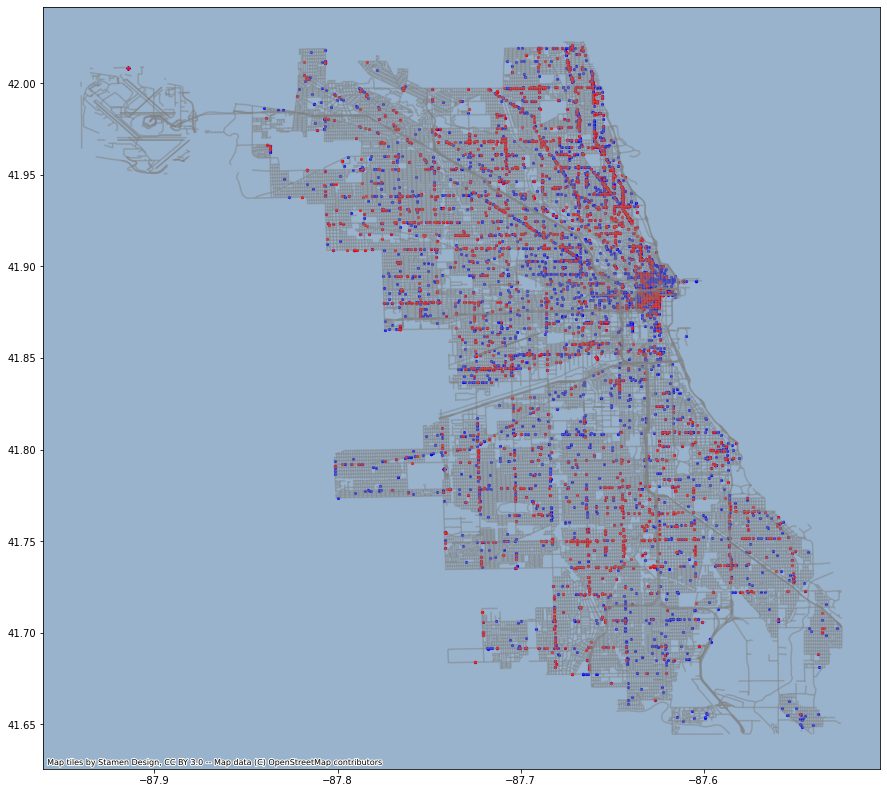

In [40]:
# fig, ax = plt.subplots(figsize=(15,15))
# chicago_map.plot(ax=ax, alpha = 0.5, color='gray')
# geo_df[geo_df['Results']=='Pass'].plot(ax=ax, markersize = 5, alpha = 0.8, color = 'blue')
# geo_df[geo_df['Results']=='Fail'].plot(ax=ax, markersize = 5, alpha = 0.8, color = 'red')
# ctx.add_basemap(ax)